In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objs as go
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , plot_confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error


from joblib import Parallel, delayed
import joblib

import warnings 
warnings.filterwarnings("ignore")

np.random.seed(42)
np.random.RandomState(42)

RandomState(MT19937) at 0x2A0AB85FC40

In [2]:
train = pd.read_csv('train_dataset.csv')
train.head()

,Depth: TMD,Bit Position,Torque Min,Torque Avg,Torque Max,WOH Max,WOH Avg,WOH Inst,WOB Max,WOB Avg,...,Pit 5 Volume,Pit 6 Volume,Gas Main: TG inst,Gas Main: C1,Gas Main: C2,Gas Main: C3,Gas Main: iC4,Gas Main: nC4,Gas Main: iC5,Gas Main: nC5
0,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.7,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
1,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
2,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
3,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.7,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
4,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.7,27.0,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003


In [3]:
def summary(data) : 
    """ Take a pandas dataframe and create a summary about missing values """
    result = (pd.DataFrame(data.dtypes, columns=["Data Type"]).reset_index().rename(columns={'index': 'Column'}))
    result["Unique"] = data.nunique().values
    result["Null"] = data.isna().sum().values
    result["%null"] = np.round(data.isna().sum().values / data.shape[0] * 100, decimals=2)
    return result

In [4]:
summary(train)

,Column,Data Type,Unique,Null,%null
0,Depth: TMD,float64,25384,0,0.0
1,Bit Position,float64,44179,0,0.0
2,Torque Min,float64,12433,0,0.0
3,Torque Avg,float64,13355,0,0.0
4,Torque Max,float64,13927,0,0.0
5,WOH Max,float64,115,0,0.0
6,WOH Avg,float64,116,0,0.0
7,WOH Inst,float64,116,0,0.0
8,WOB Max,float64,30,0,0.0
9,WOB Avg,float64,28,0,0.0


In [5]:
test = pd.read_csv('test_dataset.csv')
test.head()

,Depth: TMD,Bit Position,Torque Min,Torque Avg,Torque Max,WOH Max,WOH Avg,WOH Inst,WOB Max,WOB Avg,...,Pit 5 Volume,Pit 6 Volume,Gas Main: TG inst,Gas Main: C1,Gas Main: C2,Gas Main: C3,Gas Main: iC4,Gas Main: nC4,Gas Main: iC5,Gas Main: nC5
0,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0005,0.0,0.0006,0.0004,0.0012,0.0019,0.0008
1,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0005,0.0,0.0006,0.0004,0.0012,0.0019,0.0008
2,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0005,0.0,0.0006,0.0004,0.0012,0.0019,0.0008
3,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.5,27.0,0.0,0.0005,0.0,0.0006,0.0004,0.0012,0.0019,0.0008
4,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0005,0.0,0.0006,0.0004,0.0012,0.0019,0.0008


In [6]:
summary(test)

,Column,Data Type,Unique,Null,%null
0,Depth: TMD,float64,5197,0,0.0
1,Bit Position,float64,9886,0,0.0
2,Torque Min,float64,5630,0,0.0
3,Torque Avg,float64,6104,0,0.0
4,Torque Max,float64,6068,0,0.0
5,WOH Max,float64,94,0,0.0
6,WOH Avg,float64,93,0,0.0
7,WOH Inst,float64,97,0,0.0
8,WOB Max,float64,29,0,0.0
9,WOB Avg,float64,28,0,0.0


In [7]:
train.head(2)

,Depth: TMD,Bit Position,Torque Min,Torque Avg,Torque Max,WOH Max,WOH Avg,WOH Inst,WOB Max,WOB Avg,...,Pit 5 Volume,Pit 6 Volume,Gas Main: TG inst,Gas Main: C1,Gas Main: C2,Gas Main: C3,Gas Main: iC4,Gas Main: nC4,Gas Main: iC5,Gas Main: nC5
0,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.7,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
1,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003


### Combine train & test 

In [8]:
target = train['ROP (Time)']
target.describe()

count    72000.000000
mean        14.127261
std         23.298594
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max        124.500000
Name: ROP (Time), dtype: float64

In [9]:
train.drop(['ROP (Time)'] , axis= 1 , inplace=True)
test.index = test.index + train.shape[0]

In [10]:
data = pd.concat([train , test ], axis=0)
data.head()

,Depth: TMD,Bit Position,Torque Min,Torque Avg,Torque Max,WOH Max,WOH Avg,WOH Inst,WOB Max,WOB Avg,...,Pit 5 Volume,Pit 6 Volume,Gas Main: TG inst,Gas Main: C1,Gas Main: C2,Gas Main: C3,Gas Main: iC4,Gas Main: nC4,Gas Main: iC5,Gas Main: nC5
0,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.7,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
1,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
2,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.6,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
3,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.7,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
4,740.32,730.01,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,...,18.7,27.0,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003


In [11]:
print('the shape of train set is :' , train.shape)
print('the shape of test set is :' , test.shape)
print('the shape of data set is :' , data.shape)

the shape of train set is : (72000, 36)
the shape of test set is : (14394, 36)
the shape of data set is : (86394, 36)


### 'Torque Min', 'Torque Avg', 'Torque Max'

In [12]:
data[['Torque Min', 'Torque Avg', 'Torque Max']].describe()

,Torque Min,Torque Avg,Torque Max
count,86394.000000,86394.000000,86394.000000
mean,4466.228326,5242.628157,6034.876496
std,4795.073960,5315.945561,6107.856708
min,0.000000,0.000000,0.000000
25%,741.000000,865.000000,973.000000
50%,1033.000000,1176.000000,1366.000000
75%,9041.750000,10421.000000,12013.000000
max,17779.000000,18418.000000,30249.000000


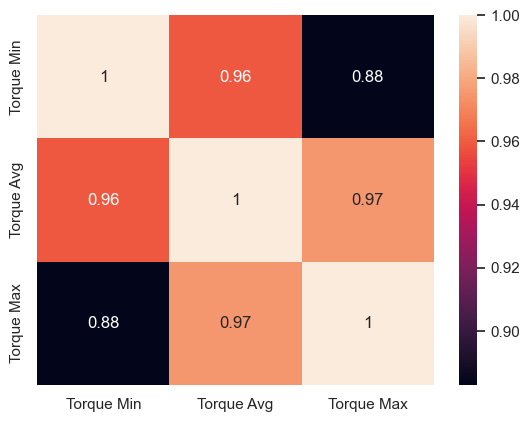

In [13]:
corr = data[['Torque Min', 'Torque Avg', 'Torque Max']].corr()
sns.heatmap(corr , annot=True)
plt.show()

In [14]:
data.drop(['Torque Min',  'Torque Max'] , axis=1 , inplace=True)

In [15]:
data.head()

,Depth: TMD,Bit Position,Torque Avg,WOH Max,WOH Avg,WOH Inst,WOB Max,WOB Avg,RPM Avg,RPM Inst,...,Pit 5 Volume,Pit 6 Volume,Gas Main: TG inst,Gas Main: C1,Gas Main: C2,Gas Main: C3,Gas Main: iC4,Gas Main: nC4,Gas Main: iC5,Gas Main: nC5
0,740.32,730.01,0.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,...,18.7,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
1,740.32,730.01,0.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,...,18.6,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
2,740.32,730.01,0.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,...,18.6,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
3,740.32,730.01,0.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,...,18.7,27.1,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003
4,740.32,730.01,0.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,...,18.7,27.0,0.0,0.0003,0.0,0.0006,0.0004,0.0027,0.0004,0.0003


### WOB Max, WOB Avg - WOB
stands for Weight on Bit, which is the force exerted by the 
drill bit on the formation being drilled. These columns represent the maximum and 
average weight on bit values measured during drilling

 The resulting feature represents the difference between the maximum and average weight on bit values measured during drilling.

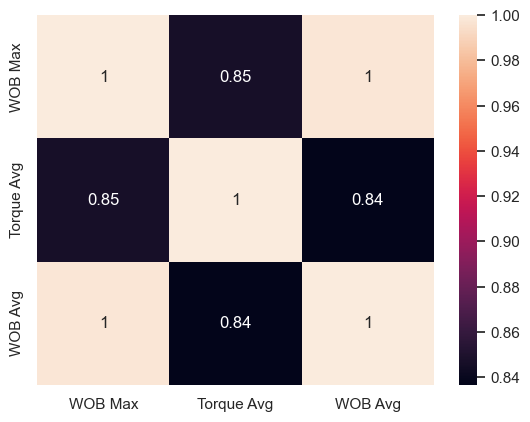

In [16]:
corr = data[['WOB Max', 'Torque Avg', 'WOB Avg']].corr()
sns.heatmap(corr , annot=True)
plt.show()

In [17]:
data.drop(['WOB Max', 'WOB Avg'] , axis=1 , inplace=True)

### gas

In [18]:
gas = data[['Gas Main: TG inst', 'Gas Main: C1', 'Gas Main: C2',
       'Gas Main: C3', 'Gas Main: iC4', 'Gas Main: nC4', 'Gas Main: iC5',
       'Gas Main: nC5']]

In [19]:
gas.describe()

,Gas Main: TG inst,Gas Main: C1,Gas Main: C2,Gas Main: C3,Gas Main: iC4,Gas Main: nC4,Gas Main: iC5,Gas Main: nC5
count,86394.000000,86394.000000,86394.000000,86394.000000,86394.000000,86394.000000,86394.000000,86394.000000
mean,0.182175,0.011928,0.003914,0.001434,0.000276,0.002372,0.001217,0.000906
std,0.229325,0.024489,0.009406,0.002593,0.000194,0.001280,0.000707,0.000601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006200,0.000100,0.000000,0.000400,0.000100,0.001700,0.000800,0.000400
50%,0.125700,0.002300,0.000300,0.000600,0.000300,0.002300,0.001200,0.000800
75%,0.384600,0.012800,0.001900,0.001000,0.000400,0.002800,0.001600,0.001200
max,18.680800,0.204900,0.066300,0.020400,0.001000,0.009400,0.004600,0.003500


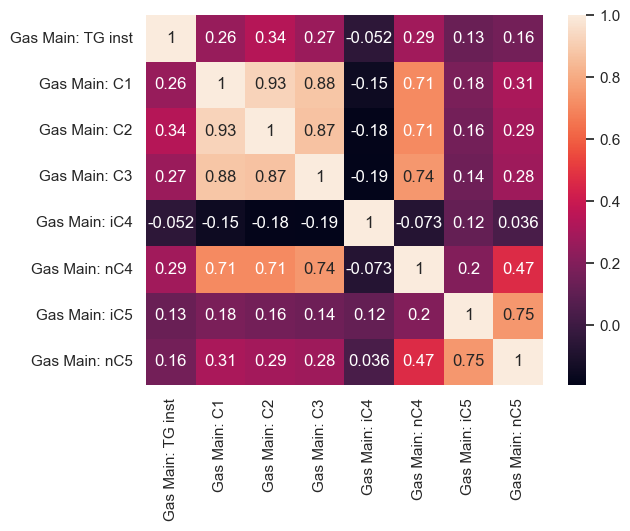

In [20]:
corr = gas.corr()
sns.heatmap(corr , annot=True)
plt.show()

In [21]:

gas.drop(['Gas Main: C1','Gas Main: C3',  'Gas Main: nC4' ,'Gas Main: iC5'] , axis=1,inplace=True)

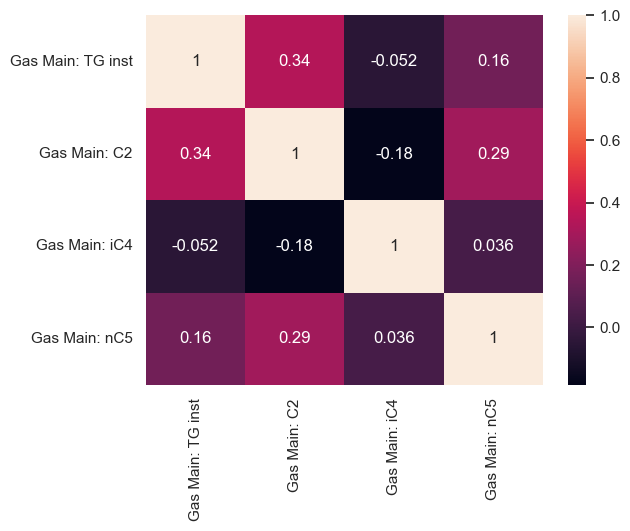

In [22]:
corr = gas.corr()
sns.heatmap(corr , annot=True)
plt.show()

In [23]:
data.drop(['Gas Main: C1','Gas Main: C3',  'Gas Main: nC4' ,'Gas Main: iC5'] , axis=1,inplace=True)


### Volume

In [24]:
volume = data[['Pit 1 Volume',
       'Pit 2 Volume', 'Pit 3 Volume', 'Pit 4 Volume', 'Pit 5 Volume',
       'Pit 6 Volume']]

In [25]:
volume.describe()

,Pit 1 Volume,Pit 2 Volume,Pit 3 Volume,Pit 4 Volume,Pit 5 Volume,Pit 6 Volume
count,86394.000000,86394.000000,86394.000000,86394.000000,86394.000000,86394.000000
mean,0.517946,19.593920,20.716600,20.801669,17.775245,19.536042
std,1.224778,4.716324,1.305224,1.473303,1.998584,7.883327
min,0.200000,0.000000,16.500000,0.000000,10.500000,6.800000
25%,0.200000,20.100000,19.800000,20.100000,16.600000,8.800000
50%,0.200000,21.300000,20.800000,21.000000,17.700000,23.000000
75%,0.200000,22.000000,21.800000,21.700000,18.900000,26.700000
max,8.300000,23.700000,23.600000,24.200000,23.700000,30.400000


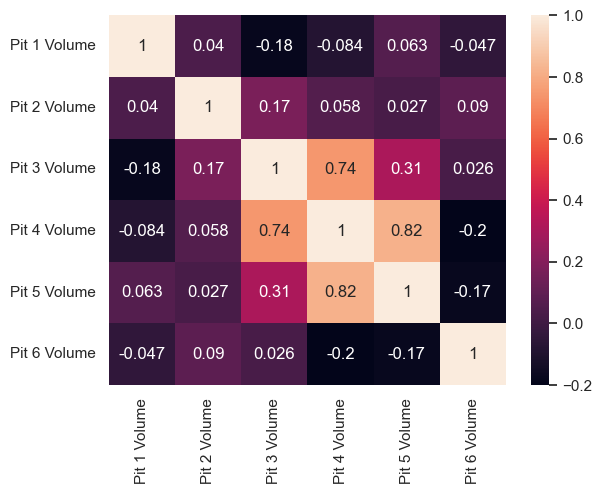

In [26]:
corr = volume.corr()
sns.heatmap(corr , annot=True)
plt.show()

In [27]:
volume.drop(['Pit 4 Volume'] , axis=1,inplace=True)

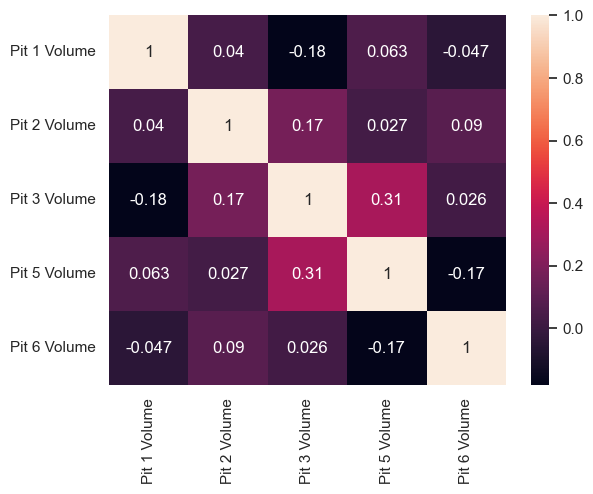

In [28]:
corr = volume.corr()
sns.heatmap(corr , annot=True)
plt.show()

### after

### Mud: Temperature IN Avg' 'Mud: Temperature OUT Avg

In [29]:
# create a new feature 'Mud: Temperature Avg'
data['MudTemperature Avg'] = (data['Mud:Temperature IN Avg'] + data['Mud: Temperature OUT Avg']) / 2

# drop the original features
data = data.drop(['Mud:Temperature IN Avg', 'Mud: Temperature OUT Avg'], axis=1)

### 'WOH Max', 'WOH Avg', 'WOH Inst'

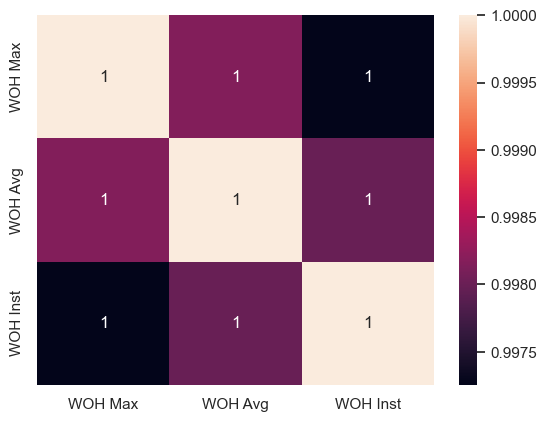

In [30]:
corr = data[['WOH Max', 'WOH Avg', 'WOH Inst']].corr()
sns.heatmap(corr , annot=True)
plt.show()

In [31]:
data.drop(['WOH Max', 'WOH Inst'] , axis=1 , inplace=True)

### 'RPM Avg', 'RPM Inst'

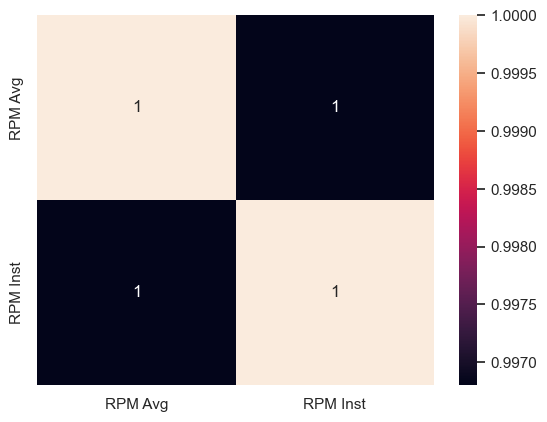

In [32]:
corr = data[['RPM Avg', 'RPM Inst']].corr()
sns.heatmap(corr , annot=True)
plt.show()

In [33]:
data.drop(['RPM Inst'] , axis=1 , inplace=True)

###  'Flow In Pumps' , 'Flow Paddle'

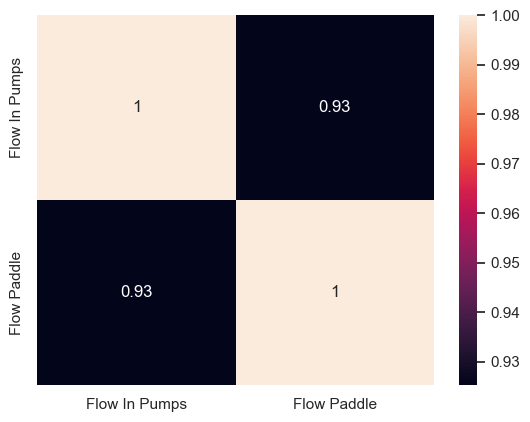

In [34]:
corr = data[['Flow In Pumps','Flow Paddle']].corr()
sns.heatmap(corr , annot=True)
plt.show()

In [35]:
data.drop(['Flow Paddle'] , axis=1 , inplace=True)

### d

In [36]:
data.drop(['Pit 4 Volume'] , axis=1,inplace=True)

In [37]:
data = data.rename(columns={'Depth: TMD': 'DepthTMD', 'Pressure: SPP Avg': 'PressureSPP Avg', 'Weight: Overpull Max': 'WeightOverpull Max', 'Weight: Drag Max': 'WeightDrag Max'
                           , 'Mud: MWI Avg': 'MudMWI Avg', 'Mud: MWO Avg': 'MudMWO Avg', 'Mud:Temperature IN Avg': 'MudTemperature IN Avg', 'Mud: Temperature OUT Avg': 'MudTemperature OUT Avg'
                           , 'as Main: TG inst': 'as MainTG inst', 'Gas Main: C1': 'Gas MainC1', 'Gas Main: iC4': 'Gas MainiC4'
                           , 'Gas Main: nC5': 'Gas MainnC5', 'Gas Main: TG inst': 'Gas Main TG inst'})

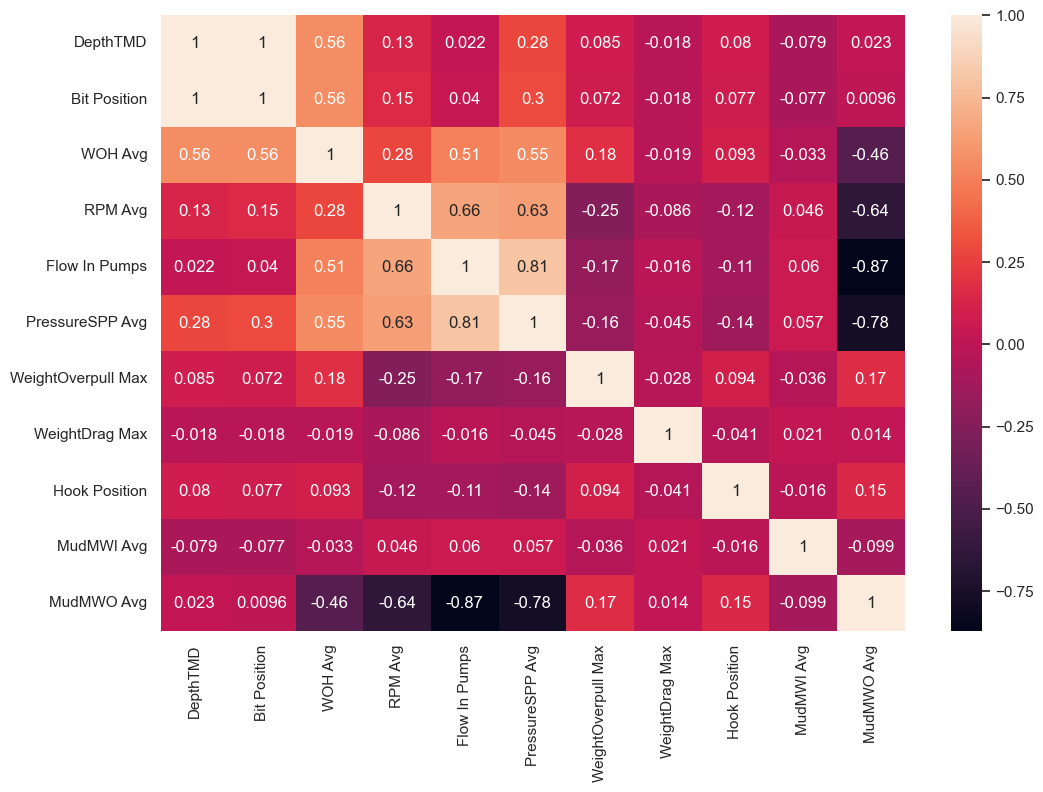

In [38]:
corr = data[['DepthTMD', 'Bit Position', 'WOH Avg', 'RPM Avg', 'Flow In Pumps',
       'PressureSPP Avg', 'WeightOverpull Max', 'WeightDrag Max',
       'Hook Position', 'MudMWI Avg', 'MudMWO Avg']].corr()

plt.subplots(figsize=(12, 8))

sns.heatmap(corr , annot=True)
plt.show()

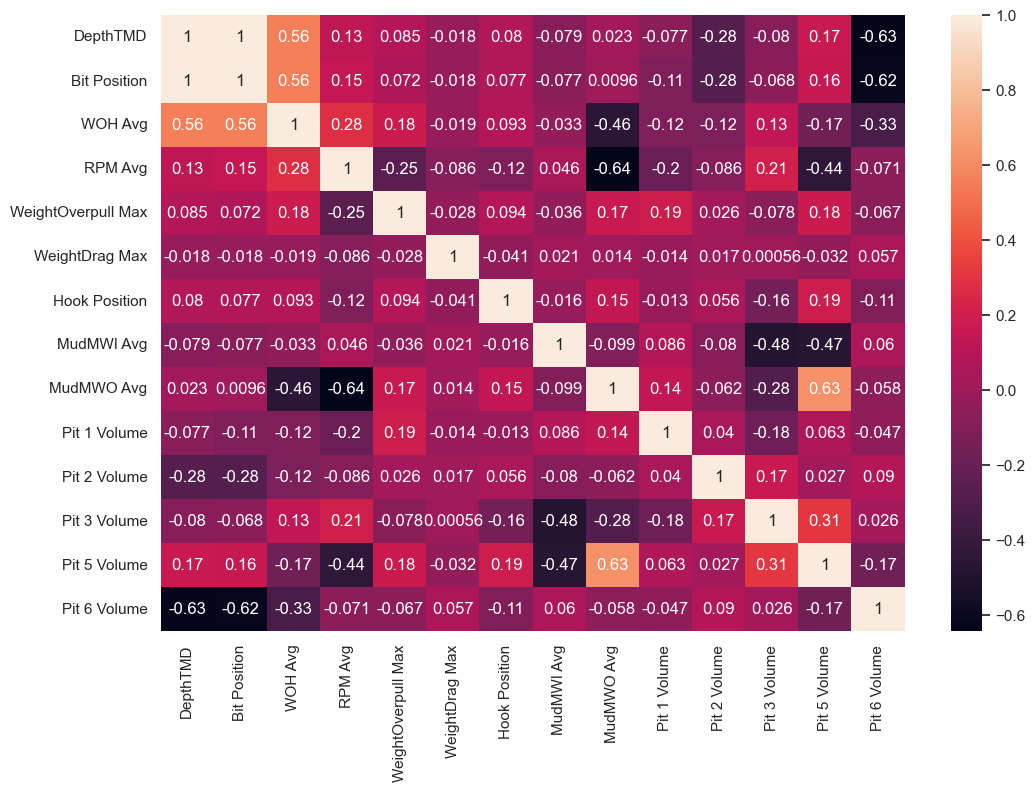

In [39]:
corr = data[['DepthTMD', 'Bit Position', 'WOH Avg', 'RPM Avg'
             , 'WeightOverpull Max', 'WeightDrag Max',
       'Hook Position', 'MudMWI Avg', 'MudMWO Avg','Pit 1 Volume', 'Pit 2 Volume', 'Pit 3 Volume','Pit 5 Volume',
       'Pit 6 Volume']].corr()

plt.subplots(figsize=(12, 8))

sns.heatmap(corr , annot=True)
plt.show()

In [40]:
train_ml = data.loc[:train.shape[0]-1]
train_ml['ID'] = train_ml.index
train_ml.head()

,DepthTMD,Bit Position,Torque Avg,WOH Avg,RPM Avg,Flow In Pumps,PressureSPP Avg,WeightOverpull Max,WeightDrag Max,Hook Position,...,Pit 2 Volume,Pit 3 Volume,Pit 5 Volume,Pit 6 Volume,Gas Main TG inst,Gas Main: C2,Gas MainiC4,Gas MainnC5,MudTemperature Avg,ID
0,740.32,730.01,0.0,20.0,0.0,1165.0,1530.0,0.0,0.0,2.33,...,20.9,20.2,18.7,27.1,0.0,0.0,0.0004,0.0003,37.00,0
1,740.32,730.01,0.0,20.0,0.0,1164.0,1529.0,0.0,0.0,2.33,...,20.9,20.2,18.6,27.1,0.0,0.0,0.0004,0.0003,36.95,1
2,740.32,730.01,0.0,20.0,0.0,1164.0,1526.0,0.0,0.0,2.33,...,20.9,20.2,18.6,27.1,0.0,0.0,0.0004,0.0003,36.95,2
3,740.32,730.01,0.0,20.0,0.0,1164.0,1530.0,0.0,0.0,2.33,...,20.9,20.2,18.7,27.1,0.0,0.0,0.0004,0.0003,36.90,3
4,740.32,730.01,0.0,20.0,0.0,1164.0,1530.0,0.0,0.0,2.33,...,21.0,20.3,18.7,27.0,0.0,0.0,0.0004,0.0003,36.90,4


In [41]:
test_ml  = data.loc[train.shape[0]:]
test_ml=test_ml.reset_index()
test_ml['ID'] = test_ml.index
test_ml.drop(['index'],axis=1,inplace=True)

In [42]:
train_ml.set_index(['ID'],inplace=True)
test_ml.set_index(['ID'],inplace=True)

In [43]:
x_train, x_val ,y_train ,y_val = train_test_split(train_ml , target , test_size=0.2 , random_state = 42)

### XG

In [44]:
# Define the model
model = XGBRegressor(objective='reg:squarederror',
                          n_estimators=1000,
                    learning_rate = 0.05,
                     max_depth=12,
                    gamma=0.2,
                     subsample=0.9,
                    colsample_bytree = 0.7,
                    # min_child_weight=7,
                    #reg_alpha=0.75,
                     #reg_lambda=0.9,max_delta_step=3
                    )

# Train the model
model.fit(x_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [45]:
# Use the model to make predictions
predictions = model.predict(x_val)


In [46]:
rmse = np.sqrt(mean_squared_error(y_val, predictions))

# Print the RMSE
print('RMSE:', rmse)

RMSE: 3.055523728270489


### dee

### all the train_ml

In [47]:
# Define the model
model = XGBRegressor(objective='reg:squarederror',
                          n_estimators=1000,
                          max_depth=12,
                    learning_rate = 0.05,
                    gamma=0.3,
                     subsample=0.9,
                    colsample_bytree = 0.7,
                    # min_child_weight=7,
                    #reg_alpha=0.75,
                     #reg_lambda=0.9,max_delta_step=3
                    )

# Train the model
model.fit(train_ml, target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
# Use the model to make predictions
predictions = model.predict(test_ml)

In [49]:
submission= pd.read_csv('sample.csv')

In [50]:
submission['ROP (Time)'] = predictions

In [51]:
submission.to_csv('submission_405.csv' , index=False)

In [52]:
target.describe()

count    72000.000000
mean        14.127261
std         23.298594
min          0.000000
25%          0.000000
50%          0.000000
75%         23.000000
max        124.500000
Name: ROP (Time), dtype: float64

In [53]:
submission['ROP (Time)'].describe()

count    14394.000000
mean        14.081605
std         22.594412
min         -2.373411
25%         -0.004777
50%          0.138326
75%         23.969756
max        117.998001
Name: ROP (Time), dtype: float64